In [7]:
#import necessary packages
import requests
import pandas as pd

#website containing weather info for a specified location
URL = 'https://api.weather.gov/points/34.312676,-83.868016'

response = requests.get(URL)

response.json()



{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/34.3127,-83.868',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-83.868, 34.3127]},
 'properties': {'@id': 'https://api.weather.gov/poi

In [8]:
#website containing info specifically regarding hourly forecast
URL = 'https://api.weather.gov/gridpoints/FFC/68,113/forecast/hourly'

response = requests.get(URL)

response.json()

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-83.8716245, 34.3198373],
    [-83.8738602, 34.297387300000004],
    [-83.84667549999999, 34.295537800000005],
    [-83.84443429999999, 34.31798750000001],
    [-83.8716245, 34.3198373]]]},
 'properties': {'units': 'us',
  'forecastGenerator': 'HourlyForecastGenerator',
  'generatedAt': '2024-11-13T19:18:03+00:00',
  'updateTime': '2024-11-13T17:56:22+00:00',
  'validTimes': '2024-11-13T11:00:00+00:00/P7DT17H',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 366.0648},
  'periods': [{'number': 1,
    'name': '',
    'startTime': '2024-11-13T14:00:00-05:00',
    'endTime': '2024-11-13T15:00:00-05:00',
    'isDaytime': True,
    

In [9]:
periods = response.json()['properties']['periods']

temp_dict = {}
for period in periods:
    temp_dict[period['startTime']] = period['temperature']
    
temp_dict

{'2024-11-13T14:00:00-05:00': 61,
 '2024-11-13T15:00:00-05:00': 61,
 '2024-11-13T16:00:00-05:00': 61,
 '2024-11-13T17:00:00-05:00': 59,
 '2024-11-13T18:00:00-05:00': 56,
 '2024-11-13T19:00:00-05:00': 54,
 '2024-11-13T20:00:00-05:00': 54,
 '2024-11-13T21:00:00-05:00': 52,
 '2024-11-13T22:00:00-05:00': 51,
 '2024-11-13T23:00:00-05:00': 50,
 '2024-11-14T00:00:00-05:00': 49,
 '2024-11-14T01:00:00-05:00': 48,
 '2024-11-14T02:00:00-05:00': 48,
 '2024-11-14T03:00:00-05:00': 47,
 '2024-11-14T04:00:00-05:00': 46,
 '2024-11-14T05:00:00-05:00': 46,
 '2024-11-14T06:00:00-05:00': 46,
 '2024-11-14T07:00:00-05:00': 46,
 '2024-11-14T08:00:00-05:00': 47,
 '2024-11-14T09:00:00-05:00': 48,
 '2024-11-14T10:00:00-05:00': 48,
 '2024-11-14T11:00:00-05:00': 49,
 '2024-11-14T12:00:00-05:00': 50,
 '2024-11-14T13:00:00-05:00': 51,
 '2024-11-14T14:00:00-05:00': 52,
 '2024-11-14T15:00:00-05:00': 53,
 '2024-11-14T16:00:00-05:00': 53,
 '2024-11-14T17:00:00-05:00': 54,
 '2024-11-14T18:00:00-05:00': 52,
 '2024-11-14T1

In [10]:
temp_dataframe = (pd.DataFrame({
    "Datetime":temp_dict.keys(),
    "Temperature (F)":temp_dict.values()})
)
temp_dataframe["Datetime"] = pd.to_datetime(temp_dataframe["Datetime"])
temp_dataframe.head()

,Datetime,Temperature (F)
0,2024-11-13 14:00:00-05:00,61
1,2024-11-13 15:00:00-05:00,61
2,2024-11-13 16:00:00-05:00,61
3,2024-11-13 17:00:00-05:00,59
4,2024-11-13 18:00:00-05:00,56


<Axes: xlabel='Datetime'>

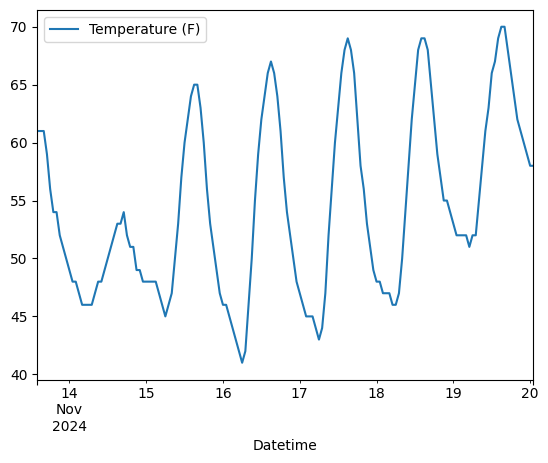

In [14]:
temp_dataframe.set_index('Datetime').plot() #.loc[2024-11-1]